In [1]:
from tracing.rl.actions import *
from tracing.rl.a3cmodel import A3CModel
from tracing.rl.rewards import *
from tracing.rl.environment import Environment
from tracing.rl.actor_learner import ActorLearnerWorker
import tensorflow as tf
import threading
import csv, re
import random

from create_dataset import read_popups_rl_dataset
from tracing.training.classification.page_classifier import PageClassifier

In [2]:
dataset = '../../../resources/popups_dataset.csv'
#pretrained_checkpoint = '../pretrain/checkpoints/pretrain_checkpoint-10'
#pretrained_checkpoint = \
#    '/home/aleksei/work/projects/g2/trace_automation/tracing/training/pretrain/checkpoints/pretrain_checkpoint-10'

In [3]:
hard_popup_urls = [
    # Choose from two options popups
    'monstervape.com',
    'twistedcigs.com',
    'ecigsejuice.com',
    'vape-fuel.com',
    'www.powervapes.net/products/',
    'ecigexpress.com',
    
     # Enter date popups
    'thecigarshop.com',
    'cigartowns.com',
    'docssmokeshop.com',
    'enhancedecigs.com',
    'betamorphecigs.com',
   
    # Subscribe
    'cigarmanor.com',  #Need email or extract close button
    'smokechophouse.com',
    
    
    # Accept Cookie
    'theglamourshop.com',
    'smokingvaporstore.com',   
]

no_popup_urls = [
    'dixieems.com',
    'firstfitness.com',
    'sandlakedermatology.com',
    'dixieems.com',
    'anabolicwarfare.com',
    'jonessurgical.com',
    'srandd.com'
]

urls = read_popups_rl_dataset(dataset)

popup_urls = list([status['url'] for status in urls if status['has_popup']==True])
random.shuffle(popup_urls)

split = int(len(popup_urls) * 0.8)
train_urls = popup_urls[:split]
test_urls = popup_urls[split:]

print('train size: ', len(train_urls))
print('test size: ', len(test_urls))

train size:  885
test size:  222


In [4]:
g1 = tf.Graph()
with g1.as_default():
    page_classifier = PageClassifier.get_pretrained()

tf.reset_default_graph()
session = tf.Session()
    
num_workers = 4

global_model = A3CModel(len(Actions.popups), session = session)

global_model.init()


# if pretrained_checkpoint:
#     saver = tf.train.Saver()
#     saver.restore(session, pretrained_checkpoint)

workers = []

for i in range(num_workers):
    env = Environment(PageRewardsCalculator.for_popups(page_classifier), headless=True)
    worker = ActorLearnerWorker("worker-{}".format(i),
                                train_urls,
                                global_model, 
                                env, 
                                actions = Actions.popups,
                                max_steps = 1000, 
                                n_step = 5, 
                                lr=0.001, 
                                l2 = 0.03,
                                entropy_l=0.2, 
                                dropout = 0.8, 
                                gamma=0.99)
    workers.append(worker)
    
coord = tf.train.Coordinator()

Instructions for updating:
keep_dims is deprecated, use keepdims instead


/home/aleksei/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Restoring parameters from /home/aleksei/.tra_cache/classification_model/model
INFO:tensorflow:Using /home/aleksei/tf_hub_cache/ to cache modules.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2018-12-11 13:46:02,539 Thread-8 INFO     

started url fuzionvapor.com
2018-12-11 13:46:02,541 Thread-9 INFO     

started url angelvapes.com
2018-12-11 13:46:02,544 Thread-10 INFO     

started url redrockvapor.com
2018-12-11 13:46:02,546 Thread-11 INFO     

started url vapegoons.com
2018-12-11 13:46:16,204 Thread-8 INFO     goal proba = 0.0
2018-12-11 13:46:17,982 Thread-11 INFO     goal proba = 2.1457672119140625e-06
2018-12-11 13:46:18,053 Thread-10 INFO     goal proba = 0.0
2018-12-11 13:46:23,078 Thread-9 INFO     goal proba = 0.01609647274017334
2018-12-11 13:46:46,514 redrockvapor.com INFO     control: Control: button, label: No, I am Under 21, values: None, min: None, max = None
2018-12-11 13:46:46,516 redrockvapor.com INFO     action: Click
2018-12-11 13:46:53,711 redrockvapor.com INFO     success: True, reward: 0
2018-12-11 13:46:53,713 angelvapes.com INFO     control: Control: button, label: I am 18+, values: None, min: None, max = None
2018-12-11 13:46:53,715 angelvapes.

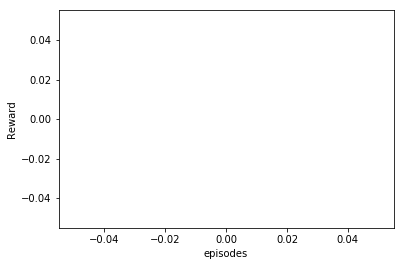

2018-12-11 13:47:09,683 fuzionvapor.com INFO     success: True, reward: 3
2018-12-11 13:47:24,959 angelvapes.com INFO     policy_loss: [[4.181006]], value_loss: 0.1116810217499733, entropy_loss: 9.020493507385254
2018-12-11 13:47:24,961 angelvapes.com INFO     sum_reward for angelvapes.com is 3.0
2018-12-11 13:47:24,963 angelvapes.com INFO     

started url vapordab.com
2018-12-11 13:47:31,934 redrockvapor.com INFO     policy_loss: [[-0.0110192]], value_loss: 0.13341619074344635, entropy_loss: 0.00029437540797516704
2018-12-11 13:47:31,938 redrockvapor.com INFO     sum_reward for redrockvapor.com is 0.0
2018-12-11 13:47:31,939 redrockvapor.com INFO     

started url elevatedvaping.com
2018-12-11 13:47:40,671 angelvapes.com INFO     goal proba = 2.2649765014648438e-06
2018-12-11 13:47:41,126 fuzionvapor.com INFO     policy_loss: [[2.2354133]], value_loss: 0.1337358057498932, entropy_loss: 8.880245208740234
2018-12-11 13:47:41,127 fuzionvapor.com INFO     sum_reward for fuzionvapor.com i

avg_reward: 2.0


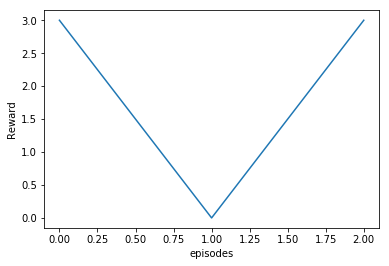

2018-12-11 13:48:04,922 fuzionvapor.com INFO     goal proba = 0.9999995351850259
2018-12-11 13:48:04,924 fuzionvapor.com INFO     

started url thevaporfactory.com
2018-12-11 13:48:07,613 vapordab.com INFO     control: Control: text, label: , values: None, min: None, max = None
2018-12-11 13:48:07,616 vapordab.com INFO     action: InputBDay
2018-12-11 13:48:13,616 vapordab.com INFO     success: True, reward: 0
2018-12-11 13:48:13,617 vapordab.com INFO     control: Control: text, label: , values: None, min: None, max = None
2018-12-11 13:48:13,618 vapordab.com INFO     action: Input Email
2018-12-11 13:48:15,578 vapordab.com INFO     success: True, reward: 0
2018-12-11 13:48:15,580 vapordab.com INFO     control: Control: text, label: , values: None, min: None, max = None
2018-12-11 13:48:15,581 vapordab.com INFO     action: InputBMonth
2018-12-11 13:48:18,747 fuzionvapor.com INFO     goal proba = 0.0
2018-12-11 13:48:21,708 vapordab.com INFO     success: True, reward: 0
2018-12-11 13:48

avg_reward: 2.0


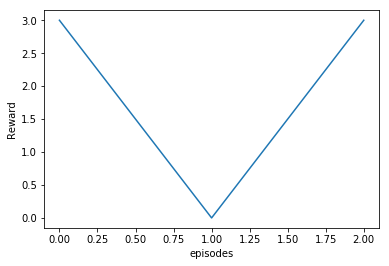

2018-12-11 13:49:10,760 vapordab.com INFO     policy_loss: [[-0.03262571]], value_loss: 0.13837140798568726, entropy_loss: 0.0018618672620505095
2018-12-11 13:49:10,763 vapordab.com INFO     sum_reward for vapordab.com is 0.0
2018-12-11 13:49:10,767 vapordab.com INFO     

started url miamicigarbundles.com
2018-12-11 13:49:10,944 thevaporfactory.com INFO     policy_loss: [[-0.0253394]], value_loss: 0.13416850566864014, entropy_loss: 0.0015013456577435136
2018-12-11 13:49:10,947 thevaporfactory.com INFO     sum_reward for thevaporfactory.com is 0.0
2018-12-11 13:49:10,952 thevaporfactory.com INFO     

started url vaportekusa.com
2018-12-11 13:49:22,401 thevaporfactory.com INFO     goal proba = 0.0
2018-12-11 13:49:27,900 vapordab.com INFO     goal proba = 0.9999999999999979
2018-12-11 13:49:27,902 vapordab.com INFO     

started url e-cig.com
2018-12-11 13:49:42,222 vapordab.com INFO     goal proba = 0.0


avg_reward: 1.2


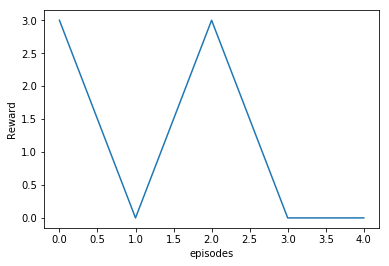

2018-12-11 13:50:10,203 e-cig.com INFO     exception during processing url: e-cig.com
Traceback (most recent call last):
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/tracing/rl/actor_learner.py", line 420, in run
    self.act_and_learn(url)
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/tracing/rl/actor_learner.py", line 308, in act_and_learn
    page_img = self.env.get_page_as_input(full_page=True, width = 300)
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/tracing/rl/environment.py", line 261, in get_page_as_input
    array = self.get_screenshot_as_array(full_page, 1., width)
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/tracing/rl/environment.py", line 290, in get_screenshot_as_array
    img = Image.open(tmp)
  File "/home/aleksei/anaconda3/lib/python3.6/site-packages/PIL/Image.py", line 2657, in open
    % (filename if filename else fp))
OSError: cannot identify image file '/tmp/64f7ebcecfdd4a87bb692358b19d89f7uaphpjh9.png'
201

avg_reward: 1.0


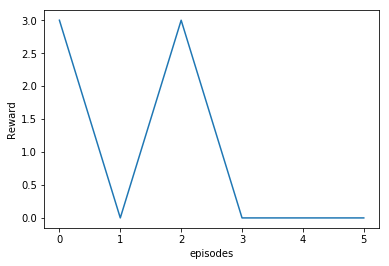

2018-12-11 13:51:19,817 vaportekusa.com INFO     goal proba = 0.0
2018-12-11 13:51:29,043 elevatedvaping.com INFO     control: Control: button, label: Exit, values: None, min: None, max = None
2018-12-11 13:51:29,045 elevatedvaping.com INFO     action: Click
2018-12-11 13:51:36,847 elevatedvaping.com INFO     success: True, reward: 0
2018-12-11 13:51:58,730 vapegoons.com INFO     control: Control: button, label: Watch later, values: None, min: None, max = None
2018-12-11 13:51:58,731 vapegoons.com INFO     action: Click
2018-12-11 13:51:59,934 vapegoons.com INFO     success: False, reward: 0


avg_reward: 1.0


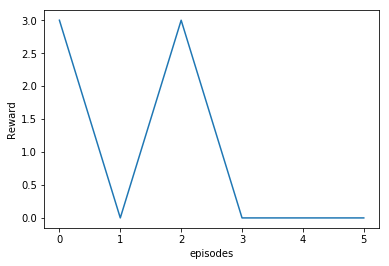

2018-12-11 13:52:18,674 rtsvapes.com INFO     control: Control: button, label: I am NOT of legal 
smoking age, values: None, min: None, max = None
2018-12-11 13:52:18,676 rtsvapes.com INFO     action: Click
2018-12-11 13:52:18,889 vapegoons.com INFO     control: Control: text, label: Email
 , values: None, min: None, max = None
2018-12-11 13:52:18,890 vapegoons.com INFO     action: Input Email
2018-12-11 13:52:21,162 vapegoons.com INFO     success: True, reward: 0
2018-12-11 13:52:21,163 vapegoons.com INFO     control: Control: button, label: X, values: None, min: None, max = None
2018-12-11 13:52:21,164 vapegoons.com INFO     action: Click
2018-12-11 13:52:25,079 springvapor.com INFO     control: Control: button, label: , values: None, min: None, max = None
2018-12-11 13:52:25,080 springvapor.com INFO     action: Click
2018-12-11 13:52:25,637 rtsvapes.com INFO     success: True, reward: 0
2018-12-11 13:52:29,293 elevatedvaping.com INFO     control: Control: button, label: Exit, values

avg_reward: 1.0


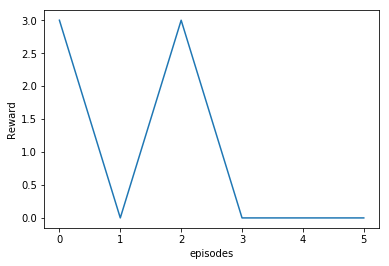

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tracing.utils.logger import get_logger

logger = get_logger()
logger.setLevel(logging.INFO)
handler = logging.StreamHandler()
formatter = logging.Formatter(
        '%(asctime)s %(threadName)s %(levelname)-8s %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

def start(worker):
    while True:
        try:
            worker.run()
            break
        except:
            pass

threads = []
for worker in workers:
    thread = threading.Thread(target=lambda: start(worker))
    thread.daemon = True
    thread.start()
    threads.append(thread)

while True:
    time.sleep(60)
    
    rewards = ActorLearnerWorker.step_rewards[:]
    if len(rewards) > 0:
        print('avg_reward:', sum(rewards) / len(rewards))
    plt.plot(np.arange(len(rewards)), rewards)
    plt.xlabel('episodes')
    plt.ylabel('Reward')
    plt.show()
    
coord.join(threads)

In [ ]:
from tracing.rl.actor_learner import ActionsMemory
from tracing.rl.actions import *
from tracing.rl.a3cmodel import A3CModel
from tracing.rl.rewards import PopupRewardsCalculator
from tracing.rl.actor_learner import ActorLearnerWorker
import threading
import numpy as np
import PIL
import time

import tracing.selenium_utils.controls as selenium_controls
import tracing.selenium_utils.common as common

from IPython.display import display, Image

env = Environment(PopupRewardsCalculator(), user={}, headless=True)
with env:
    assert env.start('goldenstatevapor.com')
    print('started')
    
    while env.has_next_control():
        ctrl = env.get_next_control()
        
        print('\n\n')

        print('step:', env.step)
        
        print(ctrl.elem.get_attribute('outerHTML'))
        print(ctrl.location)
        print(ctrl.size)
        print(str(ctrl)[:100])
        
        inp = env.get_control_as_input(ctrl)
        
        rgb = (inp * 128 + 128).astype(np.uint8)
        img = PIL.Image.fromarray(rgb, 'RGB')
        img.save('test.png')
        display(Image(filename='test.png'))   
        
        if env.step == 0:
            reward = env.apply_action(ctrl, InputBMonth())
            print('reward:', reward)
        elif env.step == 1:
            reward = env.apply_action(ctrl, InputBDay())
            print('reward:', reward)
        elif env.step == 2:
            reward = env.apply_action(ctrl, InputBYear())
            print('reward:', reward)
        elif env.step == 3:
            reward = env.apply_action(ctrl, Click())
            print('reward:', reward)
        else:
            env.apply_action(ctrl, Nothing())
        

In [ ]:
# Test Environment
from tracing.selenium_utils.common import *

env = Environment(PopupRewardsCalculator(), user={}, headless=False)

with env:
    env.start('enhancedecigs.com')

    ctrls = env.get_controls()
    assert len(ctrls) == 6

    dayCtrl = ctrls[0]
    monthCtrl = ctrls[1]
    yearCtrl = ctrls[2]
    check = ctrls[3]
    enter = ctrls[5]

    assert env.apply_action(dayCtrl, InputBDay()) == 0
    assert env.apply_action(monthCtrl, InputBMonth()) == 0
    assert env.apply_action(yearCtrl, InputBYear()) == 0
    assert env.apply_action(check, Click()) == 0
    assert env.apply_action(enter, Click()) == 100

    assert env.calc_final_reward() == 0


In [ ]:
# Test Popups Detecting

import time

rewards = PopupRewardsCalculator()

driver = create_chrome_driver()

for url in no_popup_urls:
    print('url: ', url)
    driver.get('http://' + url)
    time.sleep(2)
    assert not rewards.is_popup_exists(driver)

for url in popup_urls:
    print('url: ', url)
    driver.get('http://' + url)
    time.sleep(2)
    assert rewards.is_popup_exists(driver)

driver.quit()    